In [85]:
import geopandas as gpd
import pandas as pd
import folium
from folium import Choropleth, Circle, Marker, GeoJson
from folium.plugins import HeatMap, MarkerCluster
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [86]:
customers= pd.read_csv('training.csv')
customers.shape

(7094, 37)

In [87]:
print("There are {} customer records".format(len(customers)))

There are 7094 customer records


Now lets import the other sources of financial data. Mobile money, ATM's, Banks etc

In [88]:
mobile_money=pd.read_csv('FSDT_FinAccessMapping/mobilemoney_agents_for_upload_win.csv', encoding='latin1')

D:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (26,32,33,42,74) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [89]:
atms=pd.read_csv('FSDT_FinAccessMapping/atm_for_upload_win.csv', encoding= 'latin1')
banks=pd.read_csv('FSDT_FinAccessMapping/banks_for_upload_win.csv', encoding= 'latin1')
microfinance=pd.read_csv('FSDT_FinAccessMapping/microfinance_for_upload_win.csv', encoding='latin1')
sacco=pd.read_csv('FSDT_FinAccessMapping/sacco_for_upload_win.csv', encoding='latin1')
post_office=pd.read_csv('FSDT_FinAccessMapping/post_office_for_upload_win.csv', encoding='latin1')
#microfinance=pd.read_csv('FSDT_FinAccessMapping/microfinance_for_upload_win.csv')
pos=pd.read_csv('FSDT_FinAccessMapping/pos_for_upload_win.csv', encoding='latin1')
bus_stand=pd.read_csv('FSDT_FinAccessMapping/bus_stands_for_upload_win.csv', encoding='latin1')
_3rd_ppp=pd.read_csv('FSDT_FinAccessMapping/3rd_ppp_for_upload_win.csv', encoding='latin1')

We look at the number of sampled agent/financial institution in each category

In [90]:
dataset_list=[atms, banks, microfinance, sacco, post_office, pos, bus_stand, _3rd_ppp ]
for x in dataset_list:
    print("There are {} agents total".format(len(x)))

There are 975 agents total
There are 616 agents total
There are 294 agents total
There are 1171 agents total
There are 180 agents total
There are 405 agents total
There are 49 agents total
There are 6900 agents total


Now we rename the columns for it to make sense during analysis

In [91]:
column_names=['Unique_respondent_ID', 'Age', 'gender', 'Marital_status', 'Highest_level_of_education'
             ,'own_land', 'own_certified_land', 'own_mobile_phone', 'salaries/wages', 'trading', 
             'providing_service', 'casual_labor', 'rental_income', 'earning_interest', 'pension',
             'social_welfare', 'get_upkeep_from_someone', 'expenses_paid_for_by_someone', 'other', 
             'employer', 'trading_goods_type', 'service_type', 'sent_money_in_past_12months', 
             'last_sent_money', 'received_money_in_last_12_months', 'last_money_received', 
              'mobile_money_usage', 'bills_payment_by_mobile_money', 'kiswahili_literacy', 
              'English_literacy', 'Latitude', 'Longitude', 'mobile_money', 'save', 'borrow', 
              'insurance', 'mobile_money_classification']

In [92]:
customers.columns=column_names

In [93]:
print(customers.columns)

Index(['Unique_respondent_ID', 'Age', 'gender', 'Marital_status',
       'Highest_level_of_education', 'own_land', 'own_certified_land',
       'own_mobile_phone', 'salaries/wages', 'trading', 'providing_service',
       'casual_labor', 'rental_income', 'earning_interest', 'pension',
       'social_welfare', 'get_upkeep_from_someone',
       'expenses_paid_for_by_someone', 'other', 'employer',
       'trading_goods_type', 'service_type', 'sent_money_in_past_12months',
       'last_sent_money', 'received_money_in_last_12_months',
       'last_money_received', 'mobile_money_usage',
       'bills_payment_by_mobile_money', 'kiswahili_literacy',
       'English_literacy', 'Latitude', 'Longitude', 'mobile_money', 'save',
       'borrow', 'insurance', 'mobile_money_classification'],
      dtype='object')


In [94]:
customers.head(10)

Unique_respondent_ID  Age  gender  Marital_status  \
0                  5086   98       2               3   
1                  1258   40       1               1   
2                   331   18       2               4   
3                  6729   50       1               1   
4                  8671   34       1               1   
5                  5462   35       1               1   
6                  4886   31       2               1   
7                   621   23       2               4   
8                  8302   56       2               3   
9                  4704   37       2               1   

   Highest_level_of_education  own_land  own_certified_land  own_mobile_phone  \
0                           1         1                   2                 2   
1                           3         5                   1                 1   
2                           6         3                   2                 1   
3                           3         1                   1                 1   
4                           1         1                   2                 1   
5                           3         3                   2                 1   
6                           3         1                   2                 1   
7                           5         5                   2                 1   
8                           3         3                   2                 2   
9                           3         3                   2                 1   

   salaries/wages  trading  ...  bills_payment_by_mobile_money  \
0               0        0  ...                             -1   
1               1        0  ...                              4   
2               0        0  ...                             -1   
3               0        0  ...                             -1   
4               0        1  ...                             -1   
5               0        1  ...                             -1   
6               0        1  ...                             -1   
7               0        0  ...                              1   
8               0        1  ...                             -1   
9               0        1  ...                             -1   

   kiswahili_literacy  English_literacy  Latitude  Longitude  mobile_money  \
0                   4                 4 -4.460442  29.811396             0   
1                   1                 4 -6.176438  39.244871             1   
2                   1                 1 -6.825702  37.652798             1   
3                   1                 4 -3.372049  35.808307             1   
4                   1                 4 -7.179645  31.039095             1   
5                   1                 1 -6.362331  37.137741             0   
6                   1                 2 -8.089257  35.836415             1   
7                   2                 2 -8.916028  33.433904             1   
8                   1                 1 -3.972247  32.649951             0   
9                   1                 4 -8.033973  35.769416             1   

   save  borrow  insurance  mobile_money_classification  
0     0       0          0                            0  
1     1       1          0                            3  
2     0       0          0                            2  
3     0       1          0                            3  
4     1       0          1                            3  
5     0       1          0                            1  
6     1       1          1                            3  
7     1       0          0                            3  
8     1       1          0                            1  
9     0       0          1                            3  

[10 rows x 37 columns]

To analyse the location data in maps and perform other operations, we convert the customer dataframe to a geo-dataframe. This creates a geometry column

In [95]:
#Create a GeoDataFrame and set the CRS(Cordinate reference system to 4326)
customers_gdf= gpd.GeoDataFrame(customers, geometry=gpd.points_from_xy(customers.Longitude, customers.Latitude))
customers_gdf.crs = {'init': 'epsg:4326'}

In [96]:
customers_gdf.crs

{'init': 'epsg:4326'}

Doing the same for the other dataframes

In [97]:
atms_gdf= gpd.GeoDataFrame(atms, geometry=gpd.points_from_xy(atms.longitude, atms.latitude))
atms_gdf.crs = {'init': 'epsg:4326'}
banks_gdf= gpd.GeoDataFrame(banks, geometry=gpd.points_from_xy(banks.longitude, banks.latitude))
banks_gdf.crs = {'init': 'epsg:4326'}
microfinance_gdf= gpd.GeoDataFrame(microfinance, geometry=gpd.points_from_xy(microfinance.longitude, microfinance.latitude))
microfinance_gdf.crs = {'init':'espg:4326'}
sacco_gdf= gpd.GeoDataFrame(sacco, geometry=gpd.points_from_xy(sacco.longitude, sacco.latitude))
sacco_gdf.crs = {'init': 'epsg:4326'}
post_office_gdf= gpd.GeoDataFrame(post_office, geometry=gpd.points_from_xy(post_office.longitude, post_office.latitude))
post_office_gdf.crs = {'init': 'epsg:4326'}
pos_gdf= gpd.GeoDataFrame(pos, geometry=gpd.points_from_xy(pos.longitude, pos.latitude))
pos_gdf.crs = {'init': 'epsg:4326'}
bus_stand_gdf= gpd.GeoDataFrame(bus_stand, geometry=gpd.points_from_xy(bus_stand.longitude, bus_stand.latitude))
bus_stand_gdf.crs = {'init': 'epsg:4326'}
_3rd_ppp_gdf= gpd.GeoDataFrame(_3rd_ppp, geometry=gpd.points_from_xy(_3rd_ppp.longitude, _3rd_ppp.latitude))
_3rd_ppp_gdf.crs = {'init': 'epsg:4326'}
mobile_money_gdf=gpd.GeoDataFrame(mobile_money, geometry=gpd.points_from_xy(mobile_money.longitude, mobile_money.latitude))
mobile_money_gdf.crs = {'init': 'epsg:4326'}

In [98]:

bus_stand_gdf.head()

region      district         ward  latitude  longitude  \
0         Kagera  Bukoba Urban       Bakoba  -1.32997   31.80880   
1           Mara         Bunda        Bunda  -2.02196   33.86578   
2  Dar es Salaam     Kinondoni      Manzese  -6.79719   39.22105   
3         Dodoma  Dodoma Urban  Tambukareli  -6.18222   35.75169   
4         Mwanza         Geita    Kalangala  -2.87043   32.24156   

            bus_stand_name destination_Arusha destination_Manyara  \
0         Bukoba Bus Stand                NaN                 NaN   
1        Bunda Bus Station                NaN                 NaN   
2  Dar Express Company Ltd                Yes                 NaN   
3         Dodoma Bus Stend                Yes                 Yes   
4          Geita Bus Stand                NaN                 NaN   

  destination_Singida destination_Pwani  ... tigo_pesa mpesa airtel_cash  \
0                 NaN               NaN  ...       Yes   Yes         Yes   
1                 NaN               NaN  ...       Yes   Yes         Yes   
2                 NaN               NaN  ...       NaN   NaN         NaN   
3                 Yes               Yes  ...       NaN   NaN         NaN   
4                 NaN               NaN  ...       Yes   Yes         NaN   

  ezy_pesa voucher_money_transfer num_people_using_vouchers_to_transfer_money  \
0      NaN                     No                                         NaN   
1      NaN                     No                                         NaN   
2      NaN                     No                                         NaN   
3      NaN                     No                                         NaN   
4      NaN                     No                                         NaN   

  voucher_use_reason other_services other_services_details  \
0                NaN            NaN                    NaN   
1                NaN            NaN                    NaN   
2                NaN            NaN                    NaN   
3                NaN            NaN                    NaN   
4                NaN            NaN                    NaN   

                    geometry  
0  POINT (31.80880 -1.32997)  
1  POINT (33.86578 -2.02196)  
2  POINT (39.22105 -6.79719)  
3  POINT (35.75169 -6.18222)  
4  POINT (32.24156 -2.87043)  

[5 rows x 34 columns]

In [99]:
mobile_money_gdf.head()

region     district     ward  latitude  longitude  \
0         Ruvuma      Tunduru   Kalulu -10.28298   40.18363   
1         Ruvuma      Tunduru   Kalulu -10.28457   40.18295   
2    Kilimanjaro  Moshi Urban  Bondeni  -3.36025   37.33803   
3  Dar es Salaam    Kinondoni  Manzese  -6.80213   39.22978   
4    Kilimanjaro  Moshi Urban    Kiusa  -3.35613   37.33382   

               agent_name till_operator   agent_type  \
0             Yusuph Shop      employee   Aggregated   
1          Abdulazak Shop         owner   Aggregated   
2  Hussein Ramadhani Shop      employee  Independent   
3          Mechmaster Ltd      employee   Aggregated   
4          Bernadeta Mtui         owner  Independent   

  standalone_or_other_business other_business_type  ...  \
0             Standalone agent                 NaN  ...   
1               Other business                Duka  ...   
2             Standalone agent                 NaN  ...   
3             Standalone agent                 NaN  ...   
4               Other business                Duka  ...   

  other_local_services_details branding_but_no_service  \
0                          NaN                     Yes   
1                          NaN                      No   
2                          NaN                     NaN   
3                          NaN                     NaN   
4                          NaN                     NaN   

   branding_but_no_service_mpesa  branding_but_no_service_tigo_pesa  \
0                            Yes                                NaN   
1                            NaN                                NaN   
2                            NaN                                NaN   
3                            NaN                                NaN   
4                            NaN                                NaN   

   branding_but_no_service_ezy_pesa  branding_but_no_service_airtel_money  \
0                               NaN                                   NaN   
1                               NaN                                   NaN   
2                               NaN                                   NaN   
3                               NaN                                   NaN   
4                               NaN                                   NaN   

   branding_but_no_service_max_malipo  branding_but_no_service_selcom  \
0                                 NaN                             NaN   
1                                 NaN                             NaN   
2                                 NaN                             NaN   
3                                 NaN                             NaN   
4                                 NaN                             NaN   

  branding_but_no_service_button Pay                    geometry  
0                                NaN  POINT (40.18363 -10.28298)  
1                                NaN  POINT (40.18295 -10.28457)  
2                                NaN   POINT (37.33803 -3.36025)  
3                                NaN   POINT (39.22978 -6.80213)  
4                                NaN   POINT (37.33382 -3.35613)  

[5 rows x 113 columns]

I now bring in a shapefile of the administrative regions in Tanzania i.e Districts, Wards etc to enrich our customer geodataframe for analysys.

In [100]:
#Get Wards in Tanzania data
tz_regions=gpd.read_file('tza_admbnda_adm3_20181019/tza_admbnda_adm3_20181019.shp')

tz_regions.crs = {'init':'epsg:4326'}
    

In [101]:
print(tz_regions.crs)

{'init': 'epsg:4326'}


In [102]:
#convert from series to a geodataframe
tz_regions=gpd.GeoDataFrame(tz_regions)

In [103]:
type(tz_regions)

geopandas.geodataframe.GeoDataFrame

In [104]:
#Spatial Join Customers and region data
customers_inregions= gpd.sjoin(customers_gdf, tz_regions)

D:\Anaconda\lib\site-packages\geopandas\tools\sjoin.py:61: UserWarning: CRS of frames being joined does not match!({'init': 'epsg:4326'} != None)
  "(%s != %s)" % (left_df.crs, right_df.crs)


In [105]:
#HeatMap of customers in Tanzania
m01 = folium.Map(location=[-5.544751, 35.435301], zoom_start=5)
HeatMap(data=customers_inregions[['Latitude', 'Longitude']], radius=9).add_to(m01)
m01

In [106]:
#Heatmap of mobile money agents in tanzania
m02 = folium.Map(location=[-5.544751, 35.435301], zoom_start=5)
HeatMap(data=mobile_money_gdf[['latitude', 'longitude']], radius=9).add_to(m02)
m02

In [107]:
#Heatmap of atms in tanzania
m03 = folium.Map(location=[-5.544751, 35.435301], zoom_start=5)
HeatMap(data=atms_gdf[['latitude', 'longitude']], radius=9).add_to(m03)
m03

In [108]:
#Heatmap of post offices in tanzania
m04 = folium.Map(location=[-5.544751, 35.435301], zoom_start=5)
HeatMap(data=post_office_gdf[['latitude', 'longitude']], radius=9).add_to(m04)
m04

In [109]:
#Heatmap of bus stands in tanzania
m05 = folium.Map(location=[-5.544751, 35.435301], zoom_start=5)
HeatMap(data=bus_stand_gdf[['latitude', 'longitude']], radius=9).add_to(m05)
m05

In [110]:
#Heatmap of microfinance in tanzania
m06 = folium.Map(location=[-5.544751, 35.435301], zoom_start=5)
HeatMap(data=microfinance_gdf[['latitude', 'longitude']], radius=9).add_to(m06)
m06

In [111]:
#Heatmap of Sacco in tanzania
m07 = folium.Map(location=[-5.544751, 35.435301], zoom_start=5)
HeatMap(data=sacco_gdf[['latitude', 'longitude']], radius=9).add_to(m07)
m07

In [112]:
#Heatmap of pos machine in tanzania
m08 = folium.Map(location=[-5.544751, 35.435301], zoom_start=5)
HeatMap(data=pos_gdf[['latitude', 'longitude']], radius=9).add_to(m08)
m08

From the heatmaps, we can see that the sampled mobile money agents are mostly concentrated around the major towns/cities eg Dar es Salaam, Dodoma, Arusha and less in the outskirts/rural areas. 
This is also the case with the financial/mobile money institutions/agents

In [113]:
mm_regions=mobile_money_gdf.region.unique()
regions=tz_regions.ADM1_EN.unique()
print('There are {} regions in mobile money verses {} total TZ regions'.format(len(mm_regions), len(regions)))
missing_regions = np.setdiff1d(regions,mm_regions, assume_unique=True)
missing_regions

There are 23 regions in mobile money verses 31 total TZ regions


array(['Dar-es-salaam', 'Songwe', 'Njombe', 'Katavi', 'Simiyu', 'Geita',
       'Kaskazini Unguja', 'Kusini Unguja', 'Mjini Magharibi',
       'Kaskazini Pemba', 'Kusini Pemba'], dtype=object)

In [114]:
regions

array(['Dodoma', 'Arusha', 'Kilimanjaro', 'Tanga', 'Morogoro', 'Pwani',
       'Dar-es-salaam', 'Lindi', 'Mtwara', 'Ruvuma', 'Iringa', 'Mbeya',
       'Songwe', 'Singida', 'Tabora', 'Rukwa', 'Kigoma', 'Shinyanga',
       'Kagera', 'Mwanza', 'Mara', 'Manyara', 'Njombe', 'Katavi',
       'Simiyu', 'Geita', 'Kaskazini Unguja', 'Kusini Unguja',
       'Mjini Magharibi', 'Kaskazini Pemba', 'Kusini Pemba'], dtype=object)

In [115]:
mm_regions

array(['Ruvuma', 'Kilimanjaro', 'Dar es Salaam', 'Mbeya', 'Arusha',
       'Pwani', 'Morogoro', 'Mwanza', 'Mara', 'Manyara', 'Iringa',
       'Tanga', 'Shinyanga', 'Singida', 'Tabora', 'Lindi', 'Kigoma',
       'Mtwara', 'Dodoma', nan, 'Rukwa', 'Kagera', 'Zanzibar'],
      dtype=object)

In [116]:
tz_regions.ADM1_EN=tz_regions.ADM1_EN.replace("Dar-es-salaam", "Dar es Salaam")

In [117]:
mm_regions=mobile_money_gdf.region.unique()
regions=tz_regions.ADM1_EN.unique()
print('There are {} regions in mobile money verses {} total TZ regions'.format(len(mm_regions), len(regions)))
regions

There are 23 regions in mobile money verses 31 total TZ regions


array(['Dodoma', 'Arusha', 'Kilimanjaro', 'Tanga', 'Morogoro', 'Pwani',
       'Dar es Salaam', 'Lindi', 'Mtwara', 'Ruvuma', 'Iringa', 'Mbeya',
       'Songwe', 'Singida', 'Tabora', 'Rukwa', 'Kigoma', 'Shinyanga',
       'Kagera', 'Mwanza', 'Mara', 'Manyara', 'Njombe', 'Katavi',
       'Simiyu', 'Geita', 'Kaskazini Unguja', 'Kusini Unguja',
       'Mjini Magharibi', 'Kaskazini Pemba', 'Kusini Pemba'], dtype=object)

In [118]:
missing_regions = np.setdiff1d(regions,mm_regions, assume_unique=True)
missing_regions

array(['Songwe', 'Njombe', 'Katavi', 'Simiyu', 'Geita',
       'Kaskazini Unguja', 'Kusini Unguja', 'Mjini Magharibi',
       'Kaskazini Pemba', 'Kusini Pemba'], dtype=object)

In [119]:
zanzibar_regions=['Kaskazini Ugunja','Kusini Ugunja','Mjini Magharibi','Kaskazini Pemba','Kusini Pemba']


        

In [120]:

def replace_zanzibar(row):
        if row['ADM1_EN'] in zanzibar_regions:
            return 'Zanzibar'
        else:
            return row['ADM1_EN']
        
tz_regions['Regions']=tz_regions.apply(lambda row: replace_zanzibar(row), axis=1)


In [121]:
tz_regions.Regions.value_counts()

Tanga               215
Zanzibar            205
Dodoma              189
Kagera              181
Tabora              166
Mwanza              154
Mbeya               154
Morogoro            154
Mara                154
Kilimanjaro         153
Mtwara              149
Ruvuma              140
Lindi               136
Singida             124
Arusha              123
Manyara             122
Shinyanga           118
Simiyu              111
Pwani               111
Kigoma              111
Geita                98
Njombe               96
Iringa               93
Dar es Salaam        90
Kaskazini Unguja     65
Rukwa                64
Songwe               64
Kusini Unguja        61
Katavi               42
Name: Regions, dtype: int64

In [122]:
mm_regions=mobile_money_gdf.region.unique()
regions=tz_regions.Regions.unique()

missing_regions = np.setdiff1d(regions,mm_regions, assume_unique=True)
missing_regions

array(['Songwe', 'Njombe', 'Katavi', 'Simiyu', 'Geita',
       'Kaskazini Unguja', 'Kusini Unguja'], dtype=object)

In [123]:
#Renaming values in target variable for analysis
customers_inregions['mobile_money_classification']=\
customers_inregions['mobile_money_classification'].map({0:'None',1:'No_MM_but_One_Other',2:'Mobile_Money', 3:'MM_and_one_other'})

In [124]:
customers_inregions['mobile_money_classification'].unique()

array(['None', 'MM_and_one_other', 'No_MM_but_One_Other', 'Mobile_Money'],
      dtype=object)

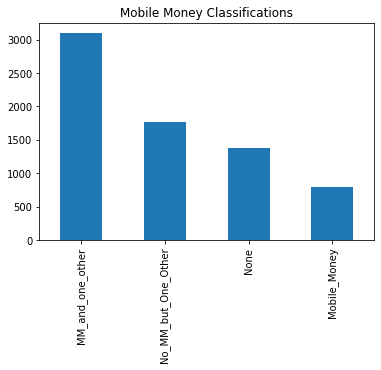

In [125]:
customers_inregions['mobile_money_classification'].value_counts().plot.bar(title='Mobile Money Classifications')

It appears most of the customers sampled have mobile money and at least one other

In [126]:
customers_inregions['gender']=customers_inregions['gender'].map({1:'Male', 2:'Female'})

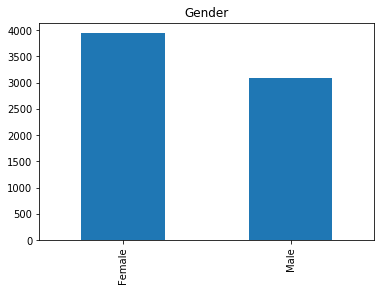

In [127]:
customers_inregions['gender'].value_counts().plot.bar(title='Gender')

It appears that the sample has more Female than Male respondents

In [128]:
customers_inregions['Age'].describe()

count    7035.000000
mean       38.236674
std        16.333812
min        16.000000
25%        25.000000
50%        35.000000
75%        48.000000
max       100.000000
Name: Age, dtype: float64

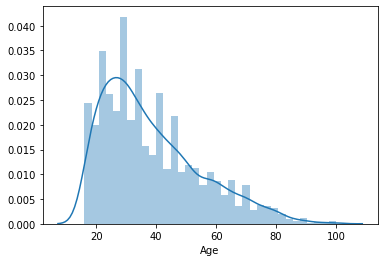

In [129]:
sns.distplot(customers_inregions['Age'])

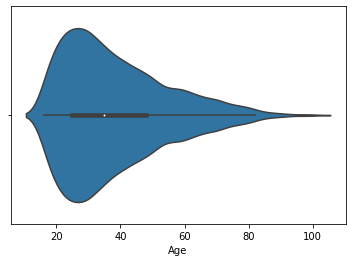

In [130]:
sns.violinplot(x='Age', data=customers_inregions)

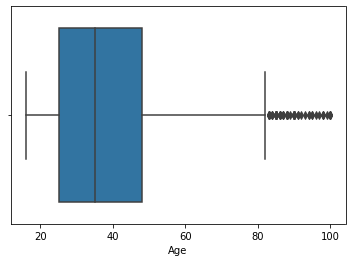

In [131]:
sns.boxplot(x='Age', data=customers_inregions)

The age of the respondents is skewed to the right with majority of them being between 20 and 40.

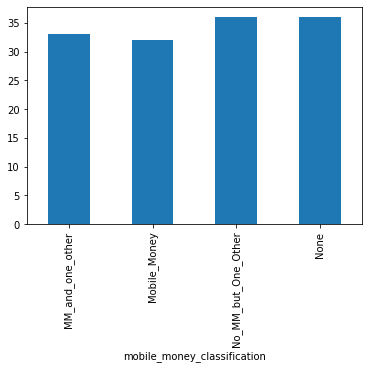

In [132]:
customers_inregions.groupby('mobile_money_classification')['Age'].median().plot(kind='bar')

Since the distribution of age is skewed, we will use median to investigate the average age of the respondents in the different categories. As expected, respondends using none of the financial solutions and no mobile money have a higher median age than those using mobile money and another financial solution. The difference in median age is however not as high as i would have expected. 
This slightly supports the theory that young people are more receptive to technology and innovstive solutions than older people

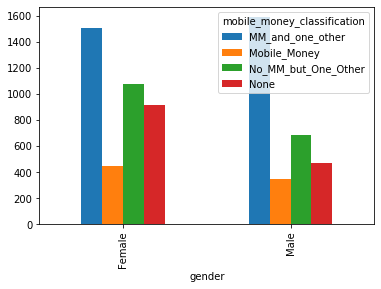

In [164]:
pd.crosstab(customers_inregions['gender'], customers_inregions['mobile_money_classification']).plot.bar()

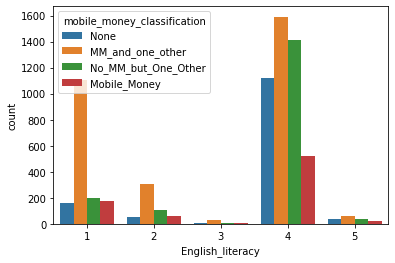

In [165]:
#Analysis of Mobile money classification and literacy

#pd.crosstab(customers_inregions['English_literacy'], customers_inregions['mobile_money_classification'])

sns.countplot(x='English_literacy', hue='mobile_money_classification', data=customers_inregions)

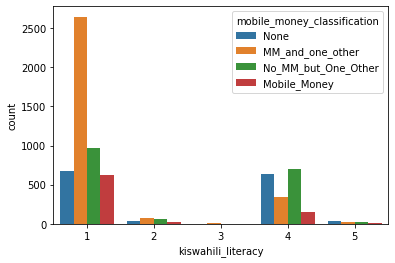

In [166]:
sns.countplot(x=customers_inregions['kiswahili_literacy'], hue='mobile_money_classification', data=customers_inregions)

From the graphs, we can tell that there is a higher number of customers that cannot read or write in English as compared to Kiswahili. 
From the graph we can assume that most of the respondents use Kiswahili while interacting with their financial services

Next i will like to look at the relationship between savings, borrowings and mobile money. This is because mobile money lending services have recently emerged in the region and have offered stiff competition to the traditional banks


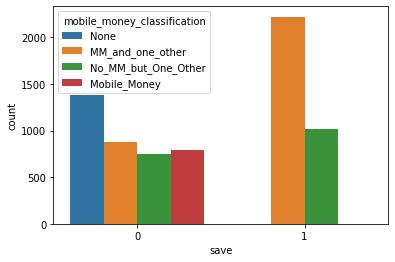

In [167]:
sns.countplot(x='save', data=customers_inregions, hue='mobile_money_classification')

From the graph, we can tell that the respondents who save, use a combination of mobile money and one other. Majority of the people who do not save also dont subscribe to any financial services as expected

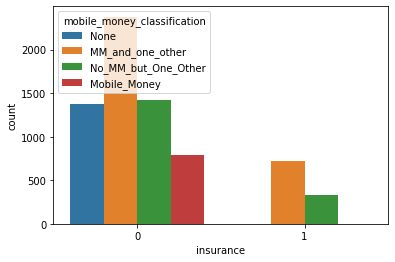

In [136]:
sns.countplot(x='insurance', data=customers_inregions, hue='mobile_money_classification')

Majority of respondents do not have insurance. This is despite a majority of them having mobile money and one other financial service

Next i will look at the relationship between the respondents source of income and financial services

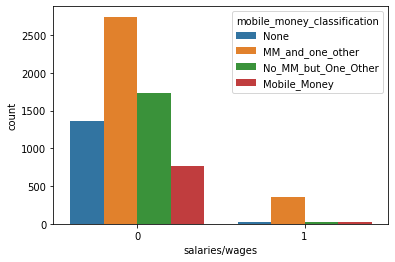

In [137]:
sns.countplot(x='salaries/wages', data=customers_inregions, hue='mobile_money_classification')

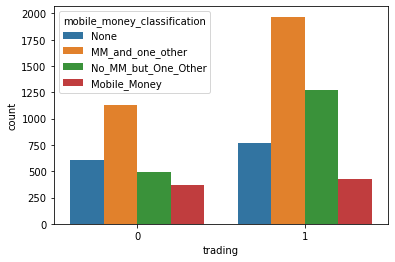

In [138]:
sns.countplot(x='trading', data=customers_inregions, hue='mobile_money_classification')

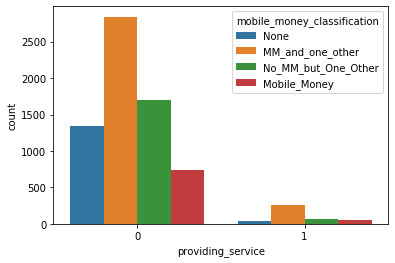

In [139]:
sns.countplot(x='providing_service', data=customers_inregions, hue='mobile_money_classification')

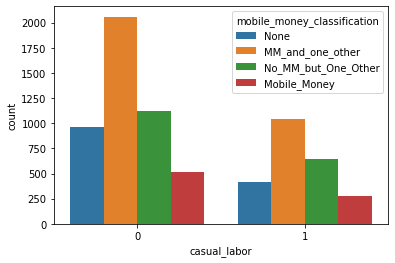

In [140]:
sns.countplot(x='casual_labor', data=customers_inregions, hue='mobile_money_classification')

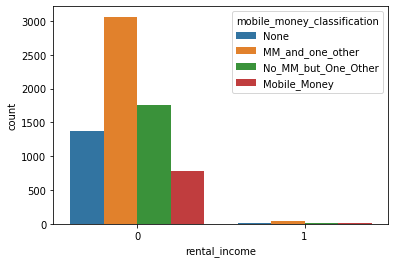

In [141]:
sns.countplot(x='rental_income', data=customers_inregions, hue='mobile_money_classification')

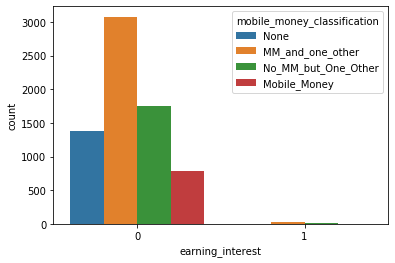

In [142]:
sns.countplot(x='earning_interest', data=customers_inregions, hue='mobile_money_classification')

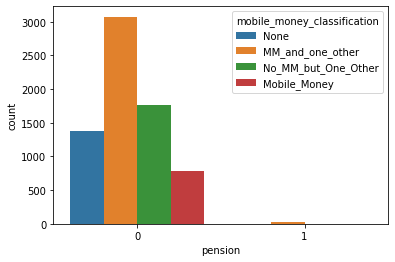

In [143]:
sns.countplot(x='pension', data=customers_inregions, hue='mobile_money_classification')

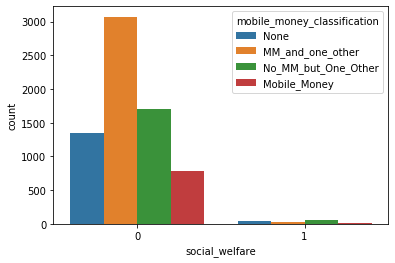

In [144]:
sns.countplot(x='social_welfare', data=customers_inregions, hue='mobile_money_classification')

In [145]:
pd.crosstab(customers_inregions['social_welfare'], customers_inregions['mobile_money_classification'])

mobile_money_classification  MM_and_one_other  Mobile_Money  \
social_welfare                                                
0                                        3072           788   
1                                          28             7   

mobile_money_classification  No_MM_but_One_Other  None  
social_welfare                                          
0                                           1703  1342  
1                                             58    37

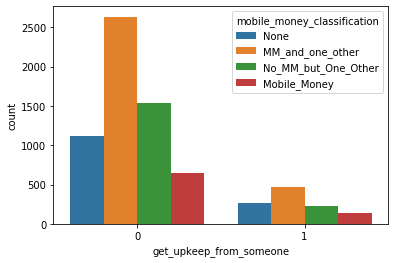

In [146]:
sns.countplot(x='get_upkeep_from_someone', data=customers_inregions, hue='mobile_money_classification')

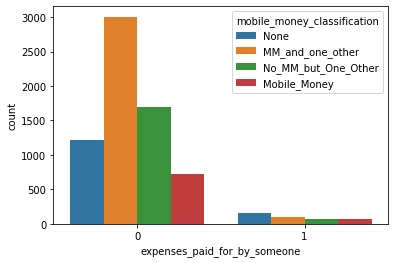

In [147]:
sns.countplot(x='expenses_paid_for_by_someone', data=customers_inregions, hue='mobile_money_classification')

We look at the relationships between the type of employer and financial service

In [148]:
customers_inregions['employer']=customers_inregions['employer']\
.map({-1:'Not_applicable', 2:'government', 3:'work_for_business_owner', 4:'ss_farmer', 5:'ls_farmer', 6:'work_for_individual/household'})

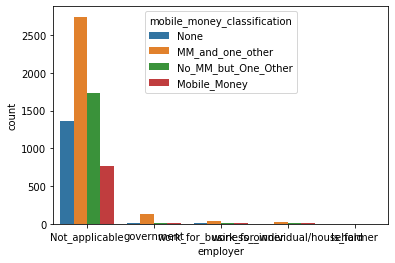

In [149]:
sns.countplot(x='employer', data=customers_inregions, hue='mobile_money_classification', orient='v')

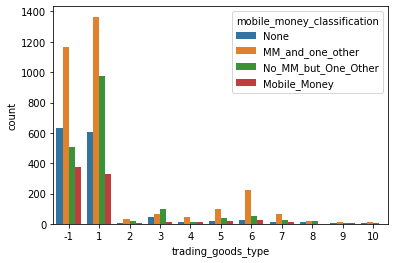

In [150]:
sns.countplot(x='trading_goods_type', data=customers_inregions, hue='mobile_money_classification', orient='v')

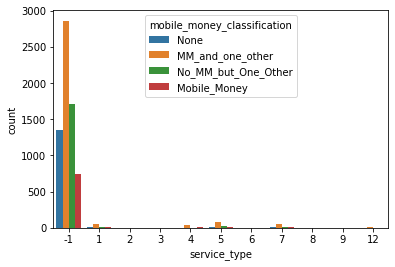

In [151]:
sns.countplot(x='service_type', data=customers_inregions, hue='mobile_money_classification', orient='v')

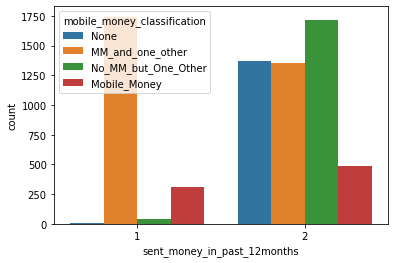

In [152]:
sns.countplot(x='sent_money_in_past_12months', data=customers_inregions, hue='mobile_money_classification', orient='v')

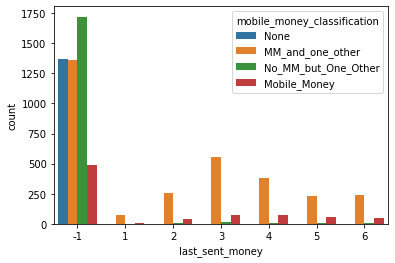

In [153]:
sns.countplot(x='last_sent_money', data=customers_inregions, hue='mobile_money_classification', orient='v')

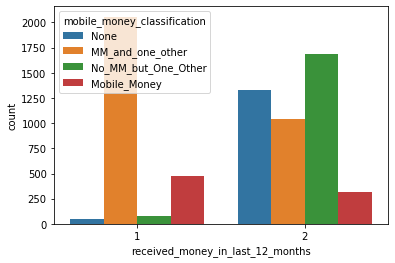

In [154]:
sns.countplot(x='received_money_in_last_12_months', data=customers_inregions, hue='mobile_money_classification', orient='v')

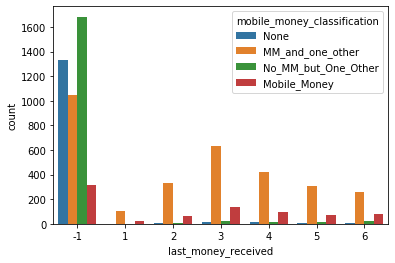

In [155]:
sns.countplot(x='last_money_received', data=customers_inregions, hue='mobile_money_classification', orient='v')

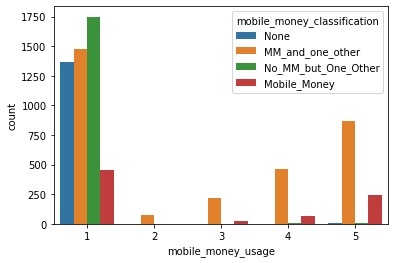

In [156]:
sns.countplot(x='mobile_money_usage', data=customers_inregions, hue='mobile_money_classification', orient='v')

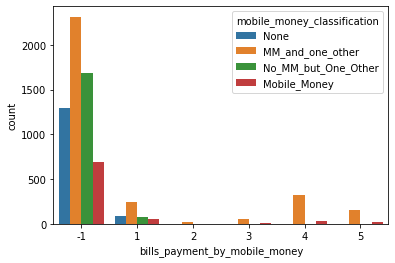

In [157]:
sns.countplot(x='bills_payment_by_mobile_money', data=customers_inregions, hue='mobile_money_classification', orient='v')

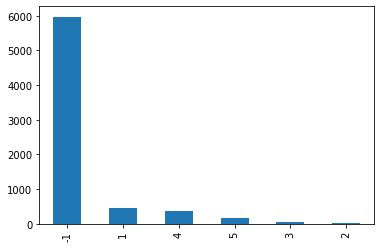

In [158]:
customers_inregions['bills_payment_by_mobile_money'].value_counts().plot.bar()

Relationship between land and financial services

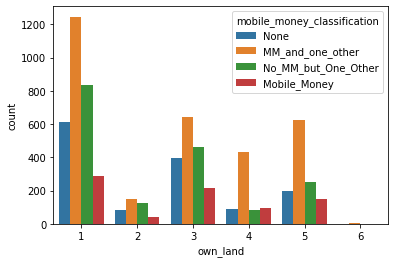

In [159]:
sns.countplot(x='own_land', data=customers_inregions, hue='mobile_money_classification')

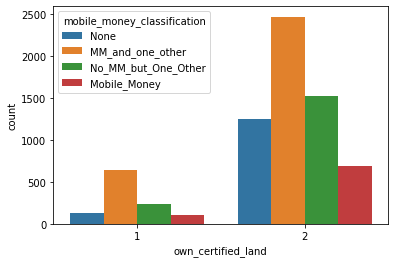

In [160]:
sns.countplot(x='own_certified_land', data=customers_inregions, hue='mobile_money_classification')

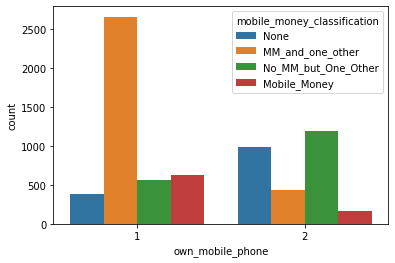

In [161]:
sns.countplot(x='own_mobile_phone', data=customers_inregions, hue='mobile_money_classification')

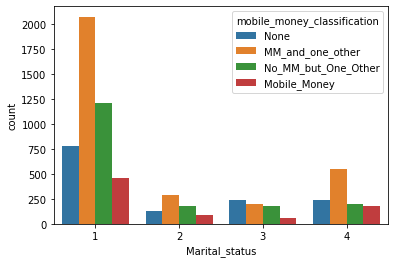

In [168]:
sns.countplot(x='Marital_status', data=customers_inregions, hue='mobile_money_classification')

Next, I will calculate the distance from each customer to the closest financial institution/ATM/Mobile Money agent as i think this would influence the type of financial service they would subscribe to.E.g Being closer to an ATM might influence the individual to sign up for banking service etc

In [169]:
from shapely.geometry import Point, MultiPoint
from shapely.ops import nearest_points

In [170]:
#Function retrieved from https://automating-gis-processes.github.io/2017/lessons/L3/nearest-neighbour.html

def nearest(row, geom_union, df1, df2, geom1_col='geometry', geom2_col='geometry', src_column=None):
    """Find the nearest point and return the corresponding value from specified column."""
    # Find the geometry that is closest
    nearest = df2[geom2_col] == nearest_points(row[geom1_col], geom_union)[1]
    # Get the corresponding value from df2 (matching is based on the geometry)
    value = df2[nearest][src_column].get_values()[0]
    return value

In [171]:
#creating a unirary union of the ATM's
unary_union = atms_gdf.unary_union


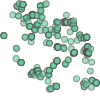

In [172]:
unary_union

In [173]:
#Add an 'id' column since it did not exist
atms_gdf['id']= range(1, len(atms_gdf) + 1)
atms_gdf.head()
 

region      district        ward  latitude  longitude  \
0  Dar es Salaam         Ilala    Kariakoo  -6.82175   39.28000   
1  Dar es Salaam         Ilala    Kariakoo  -6.81967   39.27322   
2  Dar es Salaam     Kinondoni     Manzese  -6.80376   39.26055   
3  Dar es Salaam     Kinondoni  Makumbusho  -6.77668   39.24587   
4         Tabora  Tabora Urban    Kanyenye  -5.02275   32.80941   

  onsite_offsite            bank_type                      bank_name  \
0        On-site  Commercial Bank ATM  Accessbank (Tanzania) Limited   
1        On-site     UMOJA SWITCH ATM  Accessbank (Tanzania) Limited   
2        On-site  Commercial Bank ATM  Accessbank (Tanzania) Limited   
3        On-site  Commercial Bank ATM  Accessbank (Tanzania) Limited   
4        On-site  Commercial Bank ATM  Accessbank (Tanzania) Limited   

  bank_name_short yr_operation_started  number_atms services_deposits  \
0          Access           11/12/2003            1               NaN   
1          Access           09/01/2014            1               NaN   
2          Access           07/05/2010            1               NaN   
3          Access           17/11/2011            1               NaN   
4          Access           18/12/2013            2               Yes   

  services_withdrawls services_bill_payment services_buy_airtime  \
0                 Yes                   NaN                  NaN   
1                 Yes                   NaN                  NaN   
2                 Yes                   NaN                  NaN   
3                 Yes                   NaN                  NaN   
4                 Yes                   Yes                  Yes   

  other_services visa_mastercard umoja_nmb                   geometry  id  
0            NaN            Both            POINT (39.28000 -6.82175)   1  
1            NaN            VISA            POINT (39.27322 -6.81967)   2  
2            NaN            VISA            POINT (39.26055 -6.80376)   3  
3            NaN      Mastercard            POINT (39.24587 -6.77668)   4  
4            NaN            Both            POINT (32.80941 -5.02275)   5

In [86]:
customers_inregions['nearest_ATM_id'] = customers_inregions.apply(nearest, geom_union=unary_union, df1=customers_inregions, df2=atms_gdf, geom1_col='geometry', src_column='id', axis=1)

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launc

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launc

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launc

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launc

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launc

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launc

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launc

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launc

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launc

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launc

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launc

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launc

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launc

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launc

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launc

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launc

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launc

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launc

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launc

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launc

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launc

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launc

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launc

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launc

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launc

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launc

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launc

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launc

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launc

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launc

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launc

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launc

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launc

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launc

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launc

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launc

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launc

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launc

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launc

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launc

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launc

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launc

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launc

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launc

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launc

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launc

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launc

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launc

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launc

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launc

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launc

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launc

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launc

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launc

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launc

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launc

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launc

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launc

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launc

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launc

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launc

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launc

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launc

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launc

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launc

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launc

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launc

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launc

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launc

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launc

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launc

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launc

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launc

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launc

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launc

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launc

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launc

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launc

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launc

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launc

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launc

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launc

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launc

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launc

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launc

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launc

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launc

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launc

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launc

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launc

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launc

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launc

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launc

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launc

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launc

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launc

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launc

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launc

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launc

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launc

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launc

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launc

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launc

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launc

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launc

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launc

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launc

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launc

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launc

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launc

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launc

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launc

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launc

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launc

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launc

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launc

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launc

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launc

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launc

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launc

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launc

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launc

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launc

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launc

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launc

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launc

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launc

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launc

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launc

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launc

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launc

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launc

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launc

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launc

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launc

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launc

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launc

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launc

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launc

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launc

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launc

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launc

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launc

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launc

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launc

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launc

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launc

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launc

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launc

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launc

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launc

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launc

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launc

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launc

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launc

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launc

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launc

In [133]:
customers_final_gdf=pd.read_csv('data_with_nearest1.csv')
customers_final_gdf.head()

Unnamed: 0  Unnamed: 0.1    ID  Q1  Q2  Q3  Q4  Q5  Q6  Q7  ...  savings  \
0           0             0  5086  98   2   3   1   1   2   2  ...        0   
1           1             1  1258  40   1   1   3   5   1   1  ...        1   
2           2             2   331  18   2   4   6   3   2   1  ...        0   
3           3             3  6729  50   1   1   3   1   1   1  ...        0   
4           4             4  8671  34   1   1   1   1   2   1  ...        1   

   borrowing  insurance  mobile_money_classification  \
0          0          0                            0   
1          1          0                            3   
2          0          0                            2   
3          1          0                            3   
4          0          1                            3   

                          geometry  nearest_Mobile_Money_id  nearest_bank  \
0   POINT (29.8113964 -4.46044192)                    31422           333   
1  POINT (39.24487062 -6.17643812)                    39715           499   
2  POINT (37.65279782 -6.82570215)                      251           158   
3   POINT (35.8083073 -3.37204916)                     5196           276   
4  POINT (31.03909501 -7.17964514)                    26029           334   

   nearest_microfinance  nearest_sacco  nearest_ATM_id  
0                    45            642             823  
1                   293           1079             902  
2                   137           1057             600  
3                    36            621             647  
4                   228            708             197  

[5 rows x 45 columns]

In [134]:
customers_final_gdf=customers_final_gdf.drop(customers_final_gdf[['Unnamed: 0', 'Unnamed: 0.1']], axis=1)
customers_final_gdf.head()


ID  Q1  Q2  Q3  Q4  Q5  Q6  Q7  Q8_1  Q8_2  ...  savings  borrowing  \
0  5086  98   2   3   1   1   2   2     0     0  ...        0          0   
1  1258  40   1   1   3   5   1   1     1     0  ...        1          1   
2   331  18   2   4   6   3   2   1     0     0  ...        0          0   
3  6729  50   1   1   3   1   1   1     0     0  ...        0          1   
4  8671  34   1   1   1   1   2   1     0     1  ...        1          0   

   insurance  mobile_money_classification                         geometry  \
0          0                            0   POINT (29.8113964 -4.46044192)   
1          0                            3  POINT (39.24487062 -6.17643812)   
2          0                            2  POINT (37.65279782 -6.82570215)   
3          0                            3   POINT (35.8083073 -3.37204916)   
4          1                            3  POINT (31.03909501 -7.17964514)   

   nearest_Mobile_Money_id  nearest_bank  nearest_microfinance  nearest_sacco  \
0                    31422           333                    45            642   
1                    39715           499                   293           1079   
2                      251           158                   137           1057   
3                     5196           276                    36            621   
4                    26029           334                   228            708   

   nearest_ATM_id  
0             823  
1             902  
2             600  
3             647  
4             197  

[5 rows x 43 columns]

In [135]:
customers_final_gdf.columns

Index(['ID', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8_1', 'Q8_2', 'Q8_3',
       'Q8_4', 'Q8_5', 'Q8_6', 'Q8_7', 'Q8_8', 'Q8_9', 'Q8_10', 'Q8_11', 'Q9',
       'Q10', 'Q11', 'Q12', 'Q13', 'Q14', 'Q15', 'Q16', 'Q17', 'Q18', 'Q19',
       'Latitude', 'Longitude', 'mobile_money', 'savings', 'borrowing',
       'insurance', 'mobile_money_classification', 'geometry',
       'nearest_Mobile_Money_id', 'nearest_bank', 'nearest_microfinance',
       'nearest_sacco', 'nearest_ATM_id'],
      dtype='object')

In [136]:
banks_gdf['id']= range(1, len(banks_gdf) + 1)
banks_gdf.head()

region district          ward  latitude  longitude        bank_type  \
0  Dar es Salaam   Temeke       Mbagala  -6.92247   39.27113  Commercial Bank   
1      Shinyanga   Kahama  Kahama Mjini  -3.82858   32.60006  Commercial Bank   
2  Dar es Salaam   Temeke      Miburani  -6.86209   39.26233  Commercial Bank   
3  Dar es Salaam    Ilala      Kariakoo  -6.82157   39.28025  Commercial Bank   
4  Dar es Salaam    Ilala      Kariakoo  -6.81944   39.27418  Commercial Bank   

                       bank_name weekend_trading yr_started  \
0  Accessbank (Tanzania) Limited             Yes   16/05/11   
1  Accessbank (Tanzania) Limited              No   12/07/13   
2  Accessbank (Tanzania) Limited             Yes   05/03/98   
3  Accessbank (Tanzania) Limited             Yes   10/06/09   
4  Accessbank (Tanzania) Limited             Yes   18/12/13   

  yr_started_reformatted                   geometry  id  
0              2011-5-01  POINT (39.27113 -6.92247)   1  
1              2013-7-01  POINT (32.60006 -3.82858)   2  
2              1998-3-01  POINT (39.26233 -6.86209)   3  
3              2009-6-01  POINT (39.28025 -6.82157)   4  
4             2013-12-01  POINT (39.27418 -6.81944)   5

In [137]:
bank_and_location=banks_gdf[['id', 'longitude', 'latitude']]
bank_and_location.head()

id  longitude  latitude
0   1   39.27113  -6.92247
1   2   32.60006  -3.82858
2   3   39.26233  -6.86209
3   4   39.28025  -6.82157
4   5   39.27418  -6.81944

In [138]:
customer_nearest_bank=customers_final_gdf[['ID', 'Longitude', 'Latitude','nearest_bank']]
customer_nearest_bank.head()

ID  Longitude  Latitude  nearest_bank
0  5086  29.811396 -4.460442           333
1  1258  39.244871 -6.176438           499
2   331  37.652798 -6.825702           158
3  6729  35.808307 -3.372049           276
4  8671  31.039095 -7.179645           334

In [140]:
#rename the bank and locations columns in preparation for merging on nearest bank
bank_and_location.columns=['nearest_bank', 'bank_longitude', 'bank_latitude']

In [141]:
bank_distance_analysis=customer_nearest_bank.merge(bank_and_location, on='nearest_bank', how='inner')
bank_distance_analysis.head()

ID  Longitude  Latitude  nearest_bank  bank_longitude  bank_latitude
0  5086  29.811396 -4.460442           333        30.09721        -4.5733
1  3545  30.490194 -4.199982           333        30.09721        -4.5733
2  4563  30.025934 -4.435023           333        30.09721        -4.5733
3  4896  30.034591 -4.438947           333        30.09721        -4.5733
4  2325  30.092586 -4.575918           333        30.09721        -4.5733

# Calculating distance from customer to closest bank

In [142]:
#formula borrowed from https://github.com/s-heisler/pycon2017-optimizing-pandas/blob/master/pyCon%20materials/PyCon%20un-sad%20Pandas.ipynb


def haversine(lat1, lon1, lat2, lon2):
    miles_constant = 3959
    lat1, lon1, lat2, lon2 = map(np.deg2rad, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1 
    dlon = lon2 - lon1 
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    c = 2 * np.arcsin(np.sqrt(a)) 
    mi = miles_constant * c
    return mi

In [143]:
bank_distance_analysis['distance_to_nearest_bank']=haversine(bank_distance_analysis['Latitude'].values, bank_distance_analysis['Longitude'].values, bank_distance_analysis['bank_latitude'].values, bank_distance_analysis['bank_longitude'].values)

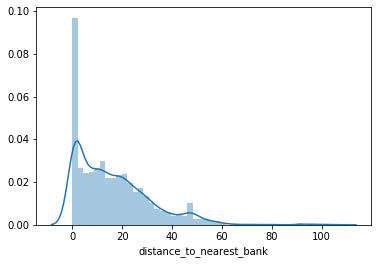

In [144]:
sns.distplot(bank_distance_analysis.distance_to_nearest_bank)

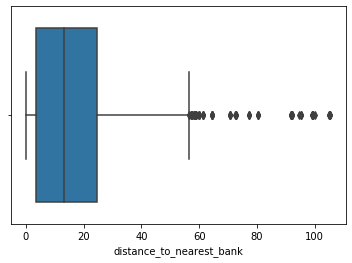

In [145]:
sns.boxplot(bank_distance_analysis.distance_to_nearest_bank)

In [147]:
bank_distance_analysis.distance_to_nearest_bank.describe()

count    7094.000000
mean       16.559922
std        15.447484
min         0.000747
25%         3.596843
50%        13.128126
75%        24.692064
max       105.380244
Name: distance_to_nearest_bank, dtype: float64

Calculating distance from customer to nearest Mobile Money Agent

In [148]:
mobile_money_gdf['id']= range(1, len(mobile_money_gdf) + 1)
mobile_money_gdf.head()

region     district     ward  latitude  longitude  \
0         Ruvuma      Tunduru   Kalulu -10.28298   40.18363   
1         Ruvuma      Tunduru   Kalulu -10.28457   40.18295   
2    Kilimanjaro  Moshi Urban  Bondeni  -3.36025   37.33803   
3  Dar es Salaam    Kinondoni  Manzese  -6.80213   39.22978   
4    Kilimanjaro  Moshi Urban    Kiusa  -3.35613   37.33382   

               agent_name till_operator   agent_type  \
0             Yusuph Shop      employee   Aggregated   
1          Abdulazak Shop         owner   Aggregated   
2  Hussein Ramadhani Shop      employee  Independent   
3          Mechmaster Ltd      employee   Aggregated   
4          Bernadeta Mtui         owner  Independent   

  standalone_or_other_business other_business_type  ...  \
0             Standalone agent                 NaN  ...   
1               Other business                Duka  ...   
2             Standalone agent                 NaN  ...   
3             Standalone agent                 NaN  ...   
4               Other business                Duka  ...   

  branding_but_no_service branding_but_no_service_mpesa  \
0                     Yes                           Yes   
1                      No                           NaN   
2                     NaN                           NaN   
3                     NaN                           NaN   
4                     NaN                           NaN   

   branding_but_no_service_tigo_pesa  branding_but_no_service_ezy_pesa  \
0                                NaN                               NaN   
1                                NaN                               NaN   
2                                NaN                               NaN   
3                                NaN                               NaN   
4                                NaN                               NaN   

   branding_but_no_service_airtel_money  branding_but_no_service_max_malipo  \
0                                   NaN                                 NaN   
1                                   NaN                                 NaN   
2                                   NaN                                 NaN   
3                                   NaN                                 NaN   
4                                   NaN                                 NaN   

   branding_but_no_service_selcom  branding_but_no_service_button Pay  \
0                             NaN                                 NaN   
1                             NaN                                 NaN   
2                             NaN                                 NaN   
3                             NaN                                 NaN   
4                             NaN                                 NaN   

                     geometry id  
0  POINT (40.18363 -10.28298)  1  
1  POINT (40.18295 -10.28457)  2  
2   POINT (37.33803 -3.36025)  3  
3   POINT (39.22978 -6.80213)  4  
4   POINT (37.33382 -3.35613)  5  

[5 rows x 114 columns]

In [149]:
customer_and_nearest_mobile_money=customers_final_gdf[['ID', 'Latitude','Longitude','nearest_Mobile_Money_id']]

In [119]:
atm_coverage = gpd.GeoDataFrame(geometry=atms_gdf.geometry).buffer(0.5)
atm_union = atm_coverage.geometry.unary_union
atm_range = customers_gdf.loc[~customers_gdf["geometry"].apply(lambda x: atm_union.contains(x))]
len(atm_range)

842

In [120]:
m50 = folium.Map(location=[-5.544751, 35.435301], zoom_start=5)
HeatMap(data=atm_range[['Latitude', 'Longitude']], radius=9).add_to(m50)
m50

In [121]:
atm_range.columns

Index(['Unique_respondent_ID', 'Age', 'gender', 'Marital_status',
       'Highest_level_of_education', 'own_land', 'own_certified_land',
       'own_mobile_phone', 'salaries/wages', 'trading', 'providing_service',
       'casual_labor', 'rental_income', 'earning_interest', 'pension',
       'social_welfare', 'get_upkeep_from_someone',
       'expenses_paid_for_by_someone', 'other', 'employer',
       'trading_goods_type', 'service_type', 'sent_money_in_past_12months',
       'last_sent_money', 'received_money_in_last_12_months',
       'last_money_received', 'mobile_money_usage',
       'bills_payment_by_mobile_money', 'kiswahili_literacy',
       'English_literacy', 'Latitude', 'Longitude', 'mobile_money', 'save',
       'borrow', 'insurance', 'mobile_money_classification', 'geometry'],
      dtype='object')

In [122]:
atm_range['mobile_money_classification'].value_counts()

1    292
3    273
0    232
2     45
Name: mobile_money_classification, dtype: int64

In [140]:
m40= folium.Map(location=[-5.544751, 35.435301], zoom_start=11)
for idx, row in outside_range.iterrows():
    Marker([row['Latitude'], row['Longitude']]).add_to(m40)
    
m40

